In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from covid19model.data import sciensano

In [72]:
report_version = 'policy_note-2021_10_26'
# Path where figures and results should be stored
results_path = '../../results/predictions/national/' + report_version
df = pd.read_csv(results_path+'/simulations.csv', index_col = [0,1,2], header=[0,1], parse_dates=True)

In [34]:
# Sciensano hospital and vaccination data
df_hosp, df_mort, df_cases, df_vacc = sciensano.get_sciensano_COVID19_data(update=False)
df_hosp = df_hosp.groupby(by=['date']).sum()

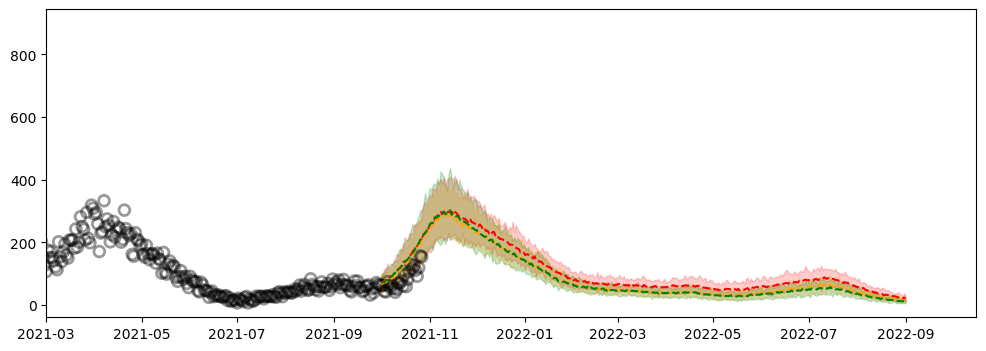

In [96]:
start_visualization = '2021-10-01'
end_visualization = '2022-09-01'
prioritization = 'old --> young'
state = 'H_in'
colors = ['red', 'orange', 'green']

dates = df.loc[start_visualization:end_visualization, slice(None), slice(None)].index.get_level_values('date').unique()

fig,ax = plt.subplots(figsize=(12,4))

for idx,refusal in enumerate(df.index.get_level_values('refusal').unique()):
    ax.plot(dates, df.loc[start_visualization:end_visualization,prioritization,refusal][state,'mean'], '--', color=colors[idx])
    ax.fill_between(dates, df.loc[start_visualization:end_visualization,prioritization,refusal][state,'LL'], df.loc[start_visualization:end_visualization,prioritization,refusal][state,'UL'], alpha=0.2, color=colors[idx])

ax.scatter(df_hosp.index,df_hosp[state], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)

ax.set_xlim(['2021-03-01',None])

plt.show()

In [110]:
enddate = '2022-12-01'
cost_vaccine = 19.5 # EUR
n_boosters = 8*10**6

for idx,prioritization in enumerate(df.index.get_level_values('vacc_order').unique()):
    for jdx,refusal in enumerate([0, 0.33]):
        QALYs_gained = df.loc[(slice(None),prioritization,1)]['QALYs_death','mean'][enddate] - df.loc[(slice(None),prioritization,refusal)]['QALYs_death','mean'][enddate]
        ICER = cost_vaccine*((1-refusal)*n_boosters)/QALYs_gained
        print('\nPrioritization: ' + prioritization)
        print('\nRefusal: ' + str(refusal))
        print('Cost per QALY: ' + str(int(ICER)) + ' EUR/QALY')


Prioritization: young --> old

Refusal: 0
Cost per QALY: 10729 EUR/QALY

Prioritization: young --> old

Refusal: 0.33
Cost per QALY: 17439 EUR/QALY

Prioritization: old --> young

Refusal: 0
Cost per QALY: 14596 EUR/QALY

Prioritization: old --> young

Refusal: 0.33
Cost per QALY: 11438 EUR/QALY
